In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])

In [4]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [5]:
#model
model = LinearRegression()
model = LinearRegression().fit(x,y)

In [6]:
#predict response
y_pred = model.predict(x)
print('predicted response: ', y_pred, sep ='\n')

y_pred = model.intercept_+model.coef_*x
print('predicted response: ', y_pred, sep ='\n')

predicted response: 
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predicted response: 
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [8]:
#predict response
x_new = np.arange(50).reshape((-1,1))
print(x_new)

y_new = model.predict(x_new)
y_new

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]]


array([ 5.63333333,  6.17333333,  6.71333333,  7.25333333,  7.79333333,
        8.33333333,  8.87333333,  9.41333333,  9.95333333, 10.49333333,
       11.03333333, 11.57333333, 12.11333333, 12.65333333, 13.19333333,
       13.73333333, 14.27333333, 14.81333333, 15.35333333, 15.89333333,
       16.43333333, 16.97333333, 17.51333333, 18.05333333, 18.59333333,
       19.13333333, 19.67333333, 20.21333333, 20.75333333, 21.29333333,
       21.83333333, 22.37333333, 22.91333333, 23.45333333, 23.99333333,
       24.53333333, 25.07333333, 25.61333333, 26.15333333, 26.69333333,
       27.23333333, 27.77333333, 28.31333333, 28.85333333, 29.39333333,
       29.93333333, 30.47333333, 31.01333333, 31.55333333, 32.09333333])

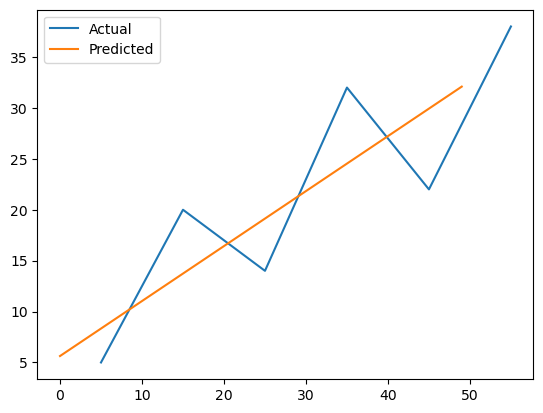

In [12]:
#display in plot 
import matplotlib.pyplot as plt
plt.plot(x,y, label= 'Actual')
plt.plot(x_new,y_new, label= 'Predicted')
plt.legend()
plt.show()

In [14]:
import requests
import pandas as pd

In [19]:
url = r'https://raw.githubusercontent.com/ferdinjoe/IoT-Based-Weather-Monitoring-for-Effective-Analytics/master/html/aqidata.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,time,PM2.5,PM10,temperature,humidity
0,2019-03-12 15:45:48.808907,10.8,11.8,25.0,68.0
1,2019-03-12 16:45:51.454505,8.6,9.3,26.0,64.0
2,2019-03-12 17:45:56.766252,17.6,19.1,27.0,61.0
3,2019-03-12 18:46:02.256138,8.6,9.5,27.0,59.0
4,2019-03-12 19:46:04.924692,16.0,17.5,27.0,63.0
...,...,...,...,...,...
134,2019-03-18 08:00:08.017041,19.1,20.9,29.0,81.0
135,2019-03-18 09:00:20.498216,18.7,20.4,29.0,80.0
136,2019-03-18 10:00:35.759471,18.3,20.0,29.0,78.0
137,2019-03-18 11:00:16.053312,18.4,20.1,29.0,78.0


In [20]:
df.isnull().sum()

time           0
PM2.5          0
PM10           0
temperature    0
humidity       0
dtype: int64

In [23]:
df.dtypes

time            object
PM2.5          float64
PM10           float64
temperature    float64
humidity       float64
dtype: object

In [24]:
from sklearn.linear_model import LinearRegression

In [44]:
#70:30
#70:30
train = df.iloc[0:110,:]
test = df.iloc[111:,:]

In [45]:
#Linear regression with PM 2.5

x = np.array(list(range(0,train['PM2.5'].count()))).reshape(-1, 1)
y = np.array(train['PM2.5'])
model25 = LinearRegression().fit(x,y)
r_sq = model25.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model25.intercept_)
print('slope:', model25.coef_)
x_test = np.array(list(range(train['PM2.5'].count(),df['PM2.5'].count()))).reshape(-1, 1)
y_pred = model25.predict(x_test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.15336225019657668
intercept: 9.31007371007371
slope: [0.06333476]
predicted response:
[16.27689741 16.34023218 16.40356694 16.4669017  16.53023646 16.59357122
 16.65690598 16.72024074 16.7835755  16.84691026 16.91024502 16.97357978
 17.03691455 17.10024931 17.16358407 17.22691883 17.29025359 17.35358835
 17.41692311 17.48025787 17.54359263 17.60692739 17.67026216 17.73359692
 17.79693168 17.86026644 17.9236012  17.98693596 18.05027072]


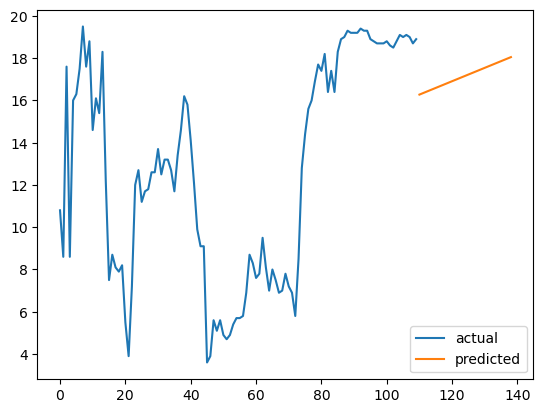

In [46]:
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

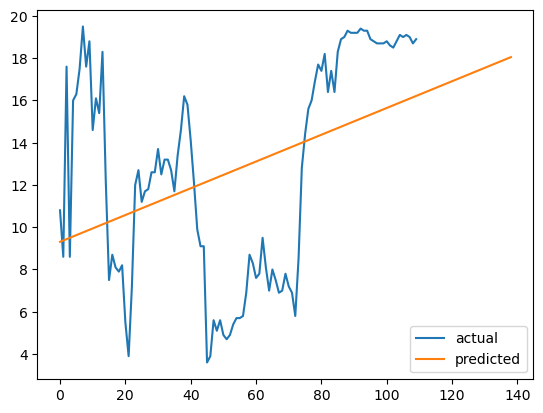

In [47]:
#wholeset

x_test = np.array(list(range(0,df['PM2.5'].count()))).reshape(-1, 1)
y_pred = model25.predict(x_test)
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

In [48]:
#Multiple regression with humidity and pm2.5

x = np.array(list(range(0,train['PM2.5'].count()))).reshape(-1, 1)
y = train[['humidity','PM2.5']]
modelHnPM = LinearRegression().fit(x,y)
r_sq = modelHnPM.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', modelHnPM.intercept_)
print('slope:', modelHnPM.coef_)

coefficient of determination: 0.09738276809204777
intercept: [73.33611794  9.31007371]
slope: [[0.03236481]
 [0.06333476]]


In [49]:
x_test = np.array(list(range(train['PM2.5'].count(),df['PM2.5'].count()))).reshape(-1, 1)
y_pred = modelHnPM.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[76.89624687 16.27689741]
 [76.92861168 16.34023218]
 [76.96097649 16.40356694]
 [76.9933413  16.4669017 ]
 [77.02570611 16.53023646]
 [77.05807091 16.59357122]
 [77.09043572 16.65690598]
 [77.12280053 16.72024074]
 [77.15516534 16.7835755 ]
 [77.18753015 16.84691026]
 [77.21989496 16.91024502]
 [77.25225977 16.97357978]
 [77.28462457 17.03691455]
 [77.31698938 17.10024931]
 [77.34935419 17.16358407]
 [77.381719   17.22691883]
 [77.41408381 17.29025359]
 [77.44644862 17.35358835]
 [77.47881343 17.41692311]
 [77.51117823 17.48025787]
 [77.54354304 17.54359263]
 [77.57590785 17.60692739]
 [77.60827266 17.67026216]
 [77.64063747 17.73359692]
 [77.67300228 17.79693168]
 [77.70536709 17.86026644]
 [77.73773189 17.9236012 ]
 [77.7700967  17.98693596]
 [77.80246151 18.05027072]]


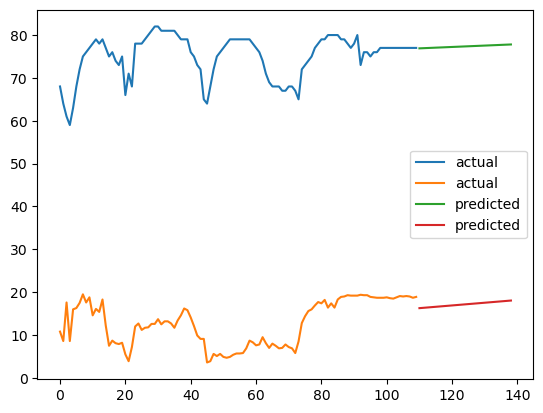

In [50]:
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

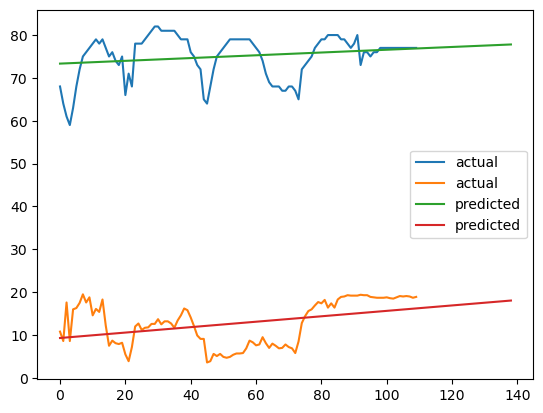

In [51]:
#wholeset

x_test = np.array(list(range(0,df['PM2.5'].count()))).reshape(-1, 1)
y_pred = modelHnPM.predict(x_test)
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()
plt.show()

In [52]:
#multiple regression with temperature and humidity

x = np.array(list(range(0,train['PM2.5'].count()))).reshape(-1, 1)
y = train[['temperature','humidity']]
modelHnPM = LinearRegression().fit(x,y)
r_sq = modelHnPM.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', modelHnPM.intercept_)
print('slope:', modelHnPM.coef_)

coefficient of determination: 0.06990009047942214
intercept: [26.94840295 73.33611794]
slope: [[0.01095508]
 [0.03236481]]


In [53]:
x_test = np.array(list(range(train['PM2.5'].count(),df['PM2.5'].count()))).reshape(-1, 1)
y_pred = modelHnPM.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[28.15346122 76.89624687]
 [28.16441629 76.92861168]
 [28.17537137 76.96097649]
 [28.18632644 76.9933413 ]
 [28.19728152 77.02570611]
 [28.20823659 77.05807091]
 [28.21919167 77.09043572]
 [28.23014674 77.12280053]
 [28.24110182 77.15516534]
 [28.25205689 77.18753015]
 [28.26301197 77.21989496]
 [28.27396704 77.25225977]
 [28.28492212 77.28462457]
 [28.29587719 77.31698938]
 [28.30683227 77.34935419]
 [28.31778735 77.381719  ]
 [28.32874242 77.41408381]
 [28.3396975  77.44644862]
 [28.35065257 77.47881343]
 [28.36160765 77.51117823]
 [28.37256272 77.54354304]
 [28.3835178  77.57590785]
 [28.39447287 77.60827266]
 [28.40542795 77.64063747]
 [28.41638302 77.67300228]
 [28.4273381  77.70536709]
 [28.43829317 77.73773189]
 [28.44924825 77.7700967 ]
 [28.46020332 77.80246151]]


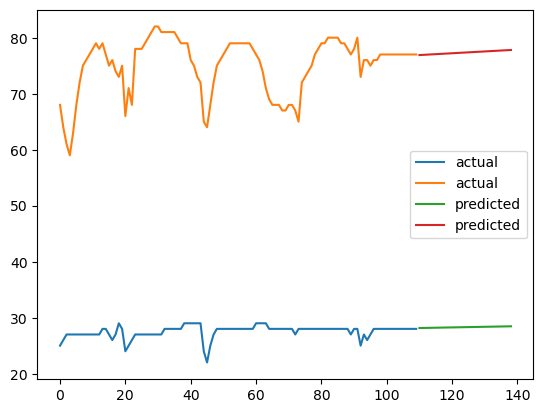

In [54]:
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

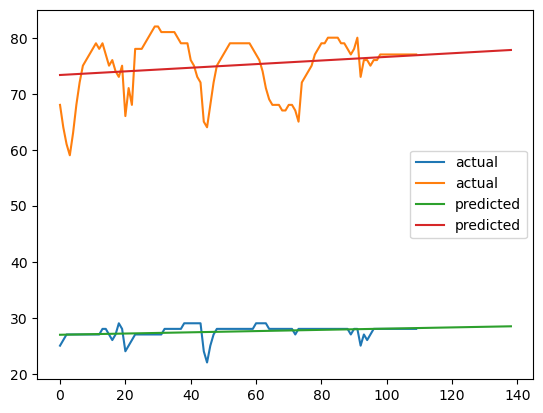

In [55]:
#wholeset

x_test = np.array(list(range(0,df['PM2.5'].count()))).reshape(-1, 1)
y_pred = modelHnPM.predict(x_test)
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

In [56]:
#polynominal regression with temperature
from sklearn.preprocessing import PolynomialFeatures

#train transform
x = np.array(list(range(0,train['temperature'].count()))).reshape(-1, 1)
y = np.array(train['temperature'])
transformer=PolynomialFeatures(degree=2,include_bias=False)
transformer.fit(x)
x_=transformer.transform(x)
x_=PolynomialFeatures(degree=2,include_bias=False).fit_transform(x)

#test transform
testx = np.array(list(range(train['PM2.5'].count(),df['PM2.5'].count()))).reshape(-1, 1)
testy = np.array(test['temperature'])
transformer=PolynomialFeatures(degree=2,include_bias=False)
transformer.fit(testx)
testx_=transformer.transform(testx)
testx_=PolynomialFeatures(degree=2,include_bias=False).fit_transform(testx)

#wholeset transform
wholex = np.array(list(range(0,df['PM2.5'].count()))).reshape(-1, 1)
wholey = np.array(df['temperature'])
transformer=PolynomialFeatures(degree=2,include_bias=False)
transformer.fit(wholex)
wholex_=transformer.transform(wholex)
wholex_=PolynomialFeatures(degree=2,include_bias=False).fit_transform(wholex)

In [57]:
modelPoly25 = LinearRegression().fit(x_,y)
r_sq = modelPoly25.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', modelPoly25.intercept_)
print('slope:', modelPoly25.coef_)

coefficient of determination: 0.14089907589278683
intercept: 26.4509477009477
slope: [ 0.03859148 -0.00025354]


In [58]:
y_pred = modelPoly25.predict(testx_)
y_pred

array([27.62811602, 27.61067406, 27.59272501, 27.57426887, 27.55530563,
       27.53583531, 27.5158579 , 27.4953734 , 27.4743818 , 27.45288312,
       27.43087735, 27.40836449, 27.38534454, 27.36181749, 27.33778336,
       27.31324214, 27.28819383, 27.26263843, 27.23657594, 27.21000635,
       27.18292968, 27.15534592, 27.12725507, 27.09865713, 27.0695521 ,
       27.03993998, 27.00982076, 26.97919446, 26.94806107])

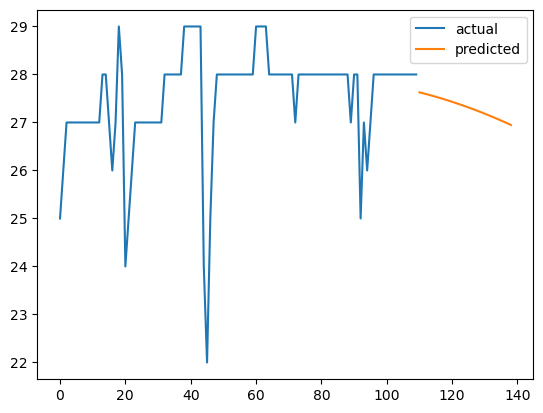

In [59]:
y_pred = modelPoly25.predict(testx_)
y_pred
plt.plot(x, y, label = "actual")
plt.plot(testx, y_pred, label = "predicted")
plt.legend()
plt.show()

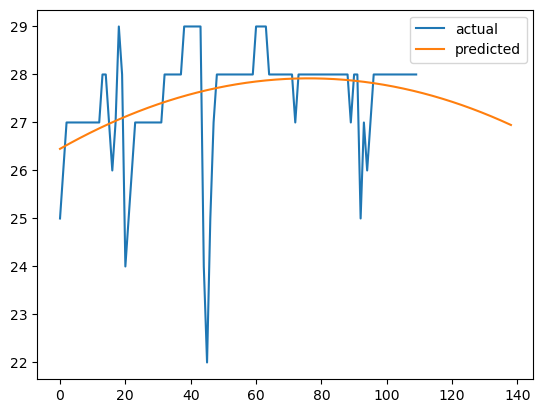

In [60]:
y_pred = modelPoly25.predict(wholex_)
y_pred
plt.plot(x, y, label = "actual")
plt.plot(df.index, y_pred, label = "predicted")
plt.legend()
plt.show()